In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import profile_report

In [21]:
df = pd.read_csv('../../data/varios/melbourne.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [22]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [24]:
df.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
34853,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34855,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,False,False


In [25]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [30]:
profile = profile_report(df, title='Pandas Profiling Report')
profile


TypeError: 'module' object is not callable

In [31]:
df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

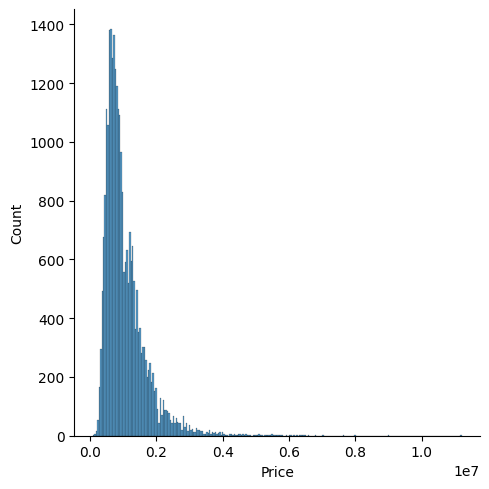

In [33]:
sns.displot(data=df, x='Price')
plt.show()

(0.0, 4000000.0)

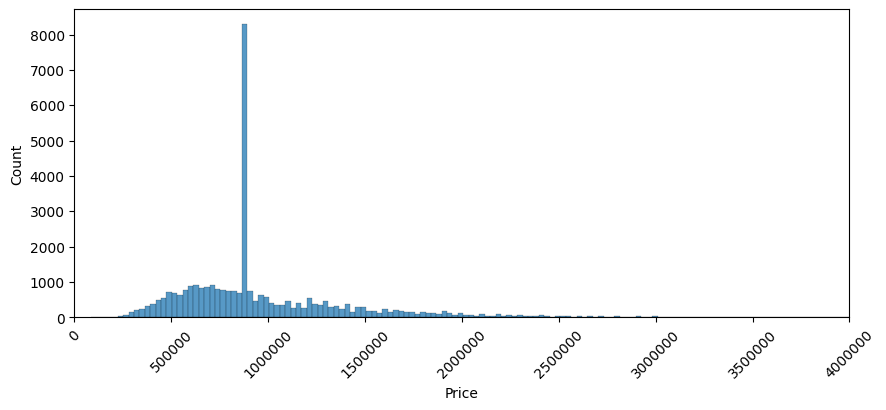

In [46]:
plt.figure(figsize=(10, 4))
df['Price'].fillna(df['Price'].median(),inplace=True)
sns.histplot(data=df, x='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.xlim(0, 4000000)



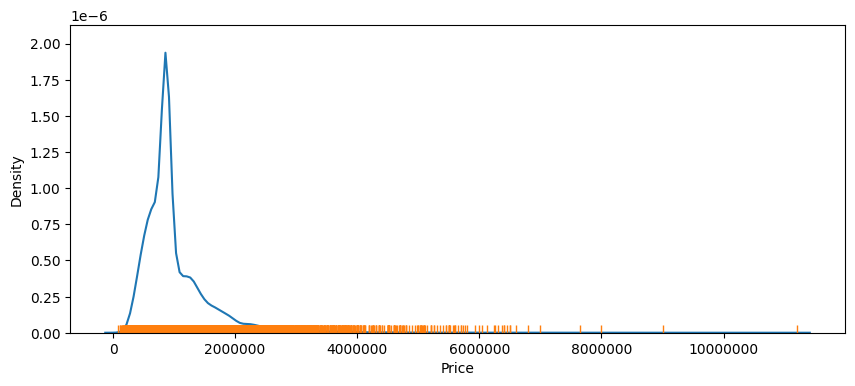

In [47]:
plt.figure(figsize=(10, 4))
sns.kdeplot(data=df, x='Price')
sns.rugplot(data=df, x='Price')
plt.ticklabel_format(style='plain', axis='x')

<Axes: xlabel='Bathroom', ylabel='count'>

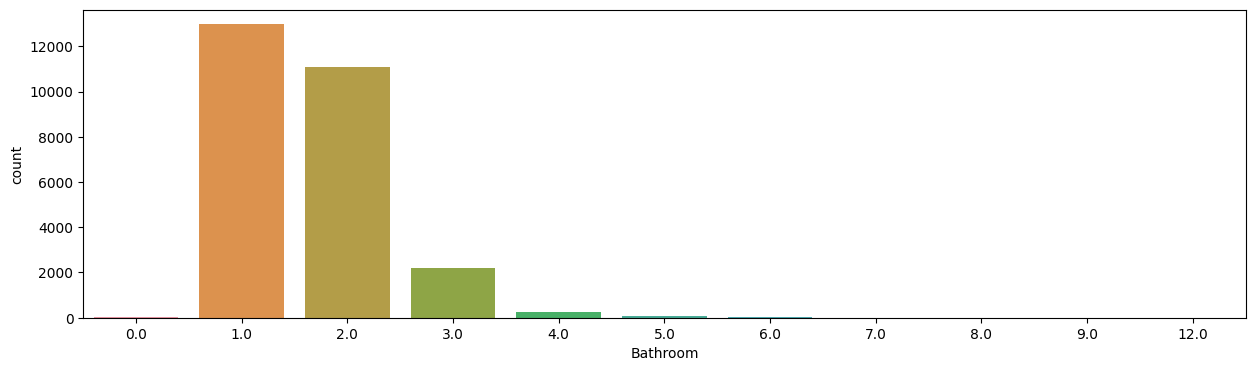

In [49]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='Bathroom')


<Axes: xlabel='Bedroom2', ylabel='count'>

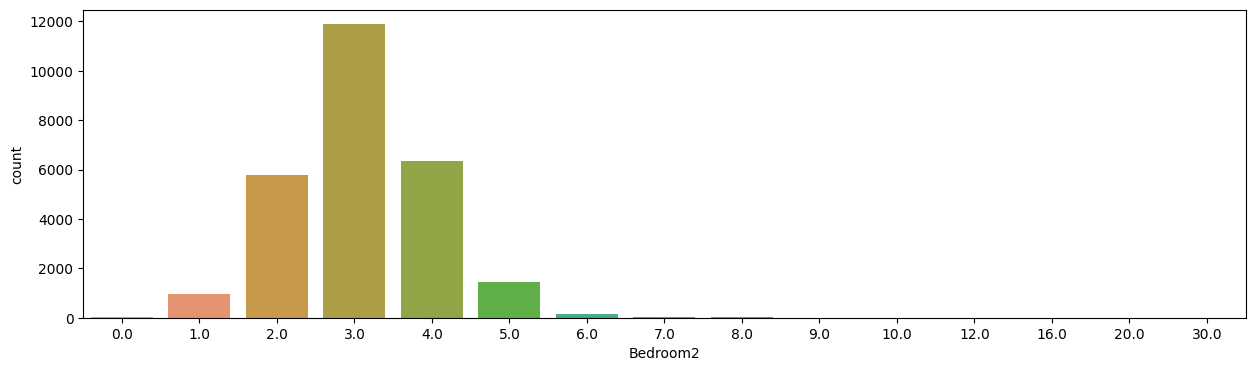

In [51]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='Bedroom2')

In [53]:
def calc_missing(df):
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        total_count = df.shape[0]
        null_percentage = (null_count/ total_count) * 100
        print(f'{col} {null_count}/ {total_count} = {null_percentage:.2f} % missing values')
        
calc_missing(df)

Distance 1/ 34857 = 0.00 % missing values
Postcode 1/ 34857 = 0.00 % missing values
Bedroom2 8217/ 34857 = 23.57 % missing values
Bathroom 8226/ 34857 = 23.60 % missing values
Car 8728/ 34857 = 25.04 % missing values
Landsize 11810/ 34857 = 33.88 % missing values
BuildingArea 21115/ 34857 = 60.58 % missing values
YearBuilt 19306/ 34857 = 55.39 % missing values
CouncilArea 3/ 34857 = 0.01 % missing values
Lattitude 7976/ 34857 = 22.88 % missing values
Longtitude 7976/ 34857 = 22.88 % missing values
Regionname 3/ 34857 = 0.01 % missing values
Propertycount 3/ 34857 = 0.01 % missing values
